In [1]:
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os
import copy

## Warmup 1: Open a connection, define the `qry` function, and save all of the movies data to a DataFrame called `movies_df"`

In [2]:
# write your code here

movies_path = "movies.db"
c = sqlite3.connect(movies_path)

def qry(sql, conn = c):
    return pd.read_sql(sql, conn)

movies_df = qry("""
SELECT *
FROM movies
""")
movies_df.head()

Title                     Genre              Director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                                Cast  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael   ...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

   Revenue  
0   333.13  
1   126.46  
2   138.12  
3   270.32  
4   325.02

## Warmup 2: What are the names and revenues of the top 2 movies by James Gunn?

In [3]:
# write your code here

qry("""
SELECT title, revenue
FROM movies
WHERE director = "James Gunn"
ORDER BY rating DESC
LIMIT 2
""")

Title  Revenue
0         Guardians of the Galaxy   333.13
1  Guardians of the Galaxy Vol. 2   389.81

## Warmup 3: What is the average revenue of movies by Brad Bird?

In [4]:
# write your code here

qry("""
SELECT director, AVG(revenue)
FROM movies
WHERE director = "Brad Bird"
""")

Director  AVG(revenue)
0  Brad Bird        279.45

## Warmup 4: What is the average revenue of movies for each director?

Sort your answer from highest to lowest

In [5]:
# write your code here

qry("""
SELECT director, AVG(revenue) as `Avg Revenue`
FROM movies
GROUP BY director
ORDER BY `Avg Revenue` DESC
""")

Director  Avg Revenue
0      James Cameron      760.510
1    Colin Trevorrow      652.180
2        Thomas Kail      612.820
3      Anthony Russo      551.255
4        Joss Whedon      541.135
..               ...          ...
674  Alex Ranarivelo        0.000
675     Akan Satayev        0.000
676    Aisling Walsh        0.000
677    Afonso Poyart        0.000
678        Adam Leon        0.000

[679 rows x 2 columns]

## Warmup 5: Of those directors who had more than 3 movies, what is the average revenue of movies for each director?

Sort your answer from highest to lowest

In [6]:
# write your code here

qry("""
SELECT director, AVG(revenue) as `Avg Revenue`, COUNT(*) as `Total Movies`
FROM movies
GROUP BY director
HAVING `Total Movies` > 3
ORDER BY `Avg Revenue` DESC
""")

Director  Avg Revenue  Total Movies
0        Anthony Russo   551.255000             4
1          J.J. Abrams   336.690000             5
2     Francis Lawrence   324.952500             4
3    Christopher Nolan   283.910000             6
4            Brad Bird   279.450000             4
5          David Yates   271.751667             6
6          Jon Favreau   256.400000             4
7          Michael Bay   236.886667             6
8        Peter Jackson   215.112500             4
9       Gore Verbinski   207.455000             4
10        Bryan Singer   201.435000             4
11         Zack Snyder   195.148000             5
12          James Gunn   182.757500             4
13          Sam Mendes   171.635000             4
14          Justin Lin   164.958000             5
15      Clint Eastwood   164.747500             4
16           James Wan   160.967500             4
17    Steven Spielberg   156.747500             4
18           Paul Feig   141.955000             4
19          Tim Burton   138.505000             4
20           Marc Webb   130.517500             4
21        Dennis Dugan   124.680000             4
22         Guy Ritchie   112.434000             5
23          Adam McKay   109.535000             4
24    David O. Russell   108.055000             4
25     Louis Leterrier   105.567500             4
26       David Fincher   105.544000             5
27          Peter Berg   102.266000             5
28   Quentin Tarantino    95.988000             5
29      Matthew Vaughn    90.262500             4
30        Ridley Scott    89.882500             8
31    Nicholas Stoller    85.222500             4
32       Antoine Fuqua    78.642000             5
33     Martin Scorsese    77.518333             6
34          Ron Howard    75.922500             4
35         Ben Affleck    64.717500             4
36  M. Night Shyamalan    61.748333             6
37  Guillermo del Toro    61.555000             4
38         D.J. Caruso    59.665000             4
39     Robert Zemeckis    56.530000             4
40    Denis Villeneuve    51.376667             6
41        Edgar Wright    47.235000             4
42        Wes Anderson    39.400000             4
43         Danny Boyle    36.680000             5
44  Paul W.S. Anderson    34.820000             6
45          Joe Wright    34.732500             4
46         Woody Allen    28.238000             5
47       Alexandre Aja    16.735000             4
48       Mike Flanagan    15.647500             4
49      Lars von Trier     1.137500             4

## Warmup 6: Of those directors who had more than 3 movies with ratings above 7.0, what is the average revenue of those movies for each director?

Sort your answer from highest to lowest

In [7]:
# write your code here

qry("""
SELECT director, AVG(revenue) as `Avg Revenue`, COUNT(*) as `Total High Movies`
FROM movies
WHERE rating > 7.0
GROUP BY director
HAVING `Total High Movies` > 3
ORDER BY `Avg Revenue` DESC
""")

Director  Avg Revenue  Total High Movies
0       Anthony Russo   551.255000                  4
1         J.J. Abrams   387.517500                  4
2         David Yates   300.784000                  5
3   Christopher Nolan   283.910000                  6
4      Clint Eastwood   164.747500                  4
5         Guy Ritchie   112.434000                  5
6       David Fincher   105.544000                  5
7   Quentin Tarantino    95.988000                  5
8      Matthew Vaughn    90.262500                  4
9     Martin Scorsese    77.518333                  6
10   Denis Villeneuve    61.450000                  5
11        Danny Boyle    45.270000                  4
12       Wes Anderson    39.400000                  4

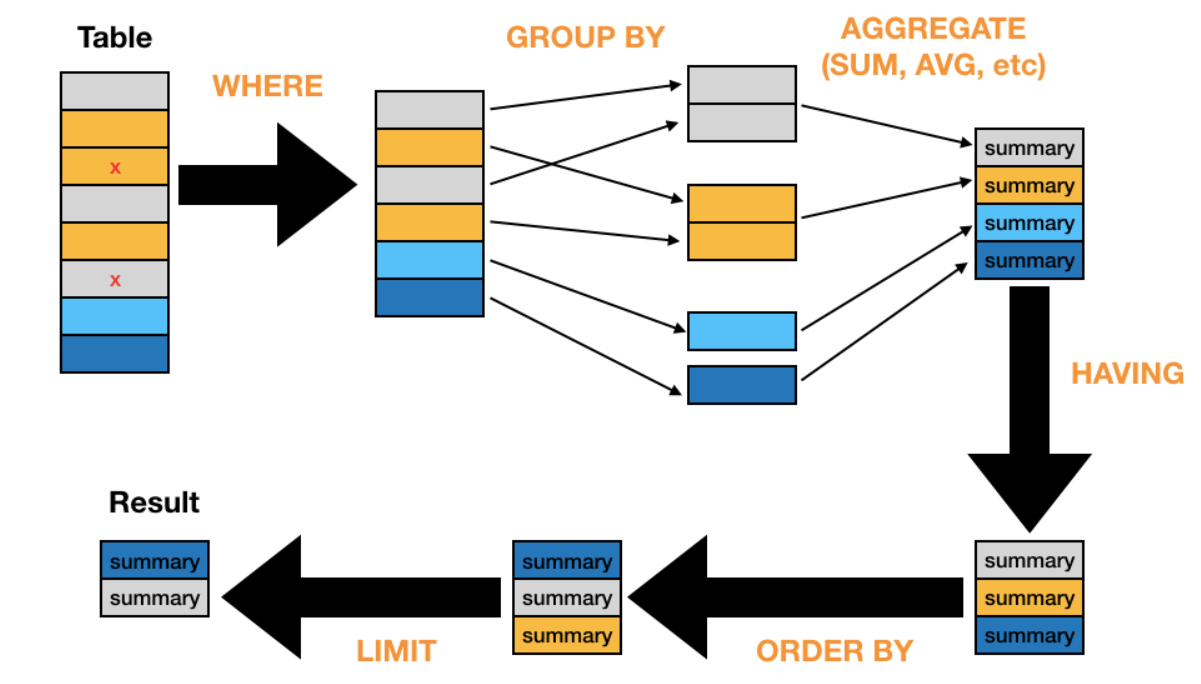

## Warmup 7: Make a scatter plot where the rating is on the x-axis and the revenue is on the y-axis

<Axes: xlabel='Rating', ylabel='Revenue'>

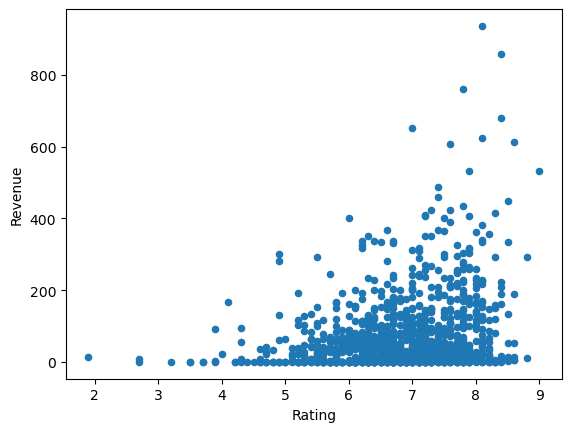

In [8]:
# write your code here

movies_df.plot.scatter(x="Rating", y="Revenue")

## Warmup 8: What is the correlation between the rating and the revenue?

In [9]:
# write your code here

movies_df[["Rating", "Revenue"]].corr()

Rating   Revenue
Rating   1.000000  0.256041
Revenue  0.256041  1.000000

# Lecture 34: Bar Plots

Learning Objectives:
- Make a bar plot from a Pandas Series
- Add features: x-label, y-label, title, gridlines, color to plot
- Set the index of a DataFrame certain column
- Create an 'other' column in a DataFrame


In [10]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how Matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


In [11]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for Pandas Plots
# rc stands for runtime config, syntax is like a dictionary

# matplotlib.rcParams                        # show all parameters
# matplotlib.rcParams["font.size"]           # show current font size setting
# matplotlib.rcParams["font.size"] = 18      # change current font size setting

## Bar plots: From a Series
The index is the x-label

The values are the height of each bar

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

In [12]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

s

Police     5000000
Fire       3000000
Schools    2000000
dtype: int64

## Example 1: Make a bar plot using `Series.plot.bar`

Note the `type` of the plot object

<Axes: >

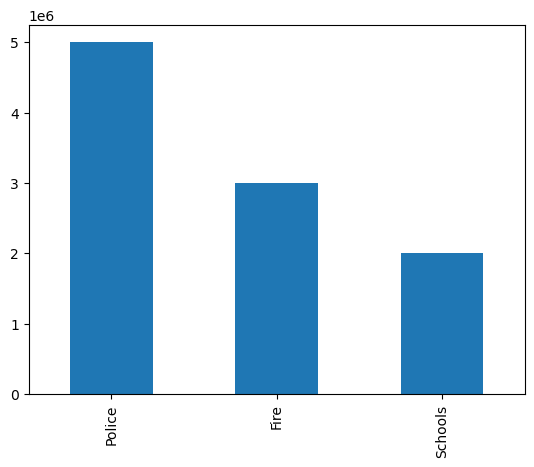

In [13]:
s.plot.bar()

#### If we store the returned object in a variable, we can configure the Axes, typically the variable name used is `ax`

matplotlib.axes._axes.Axes

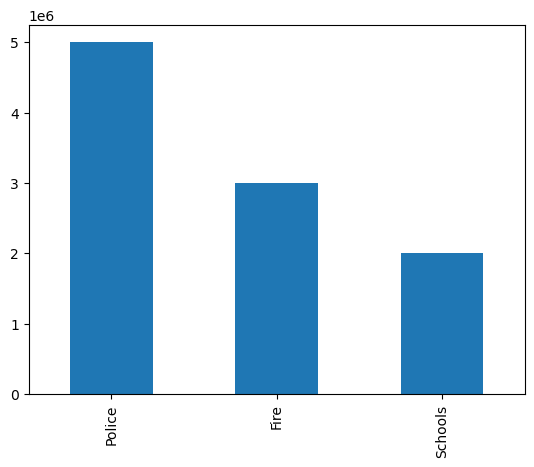

In [14]:
ax = s.plot.bar() 
type(ax)

#### We can use this Axes object to set the x axis, y axis, labels and titles

## Example 2: Use the Axes object to change the labels and titles of the bar plot

Text(0.5, 1.0, 'Annual City Spending')

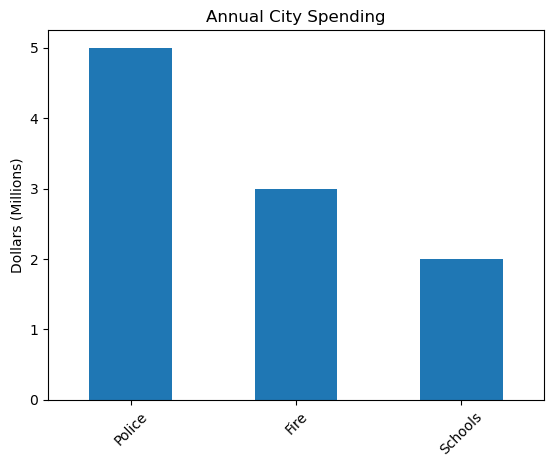

In [15]:
ax = (s/10**6).plot.bar()

ax.set_xticklabels(list(s.index), rotation=45) # give the x ticklabels a rotation of 45 degrees

ax.set_ylabel("Dollars (Millions)") # set the y_label to "Dollars (Millions)"

ax.set_title("Annual City Spending") # set the title to "Annual City Spending"

## Example 3: Change the figure size of the plot

<pre>
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)
</pre>

Text(0.5, 1.0, 'Annual City Spending')

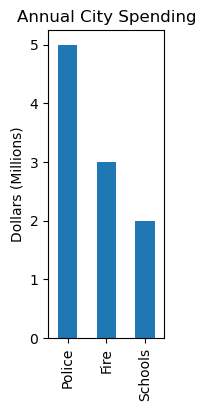

In [16]:
ax = (s/10**6).plot.bar(figsize=(1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

## Example 4: Make a horizontal bar plot

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html

<pre>
- switch figsize arguments
- change y-label to x-label
</pre>

Text(0.5, 1.0, 'Annual City Spending')

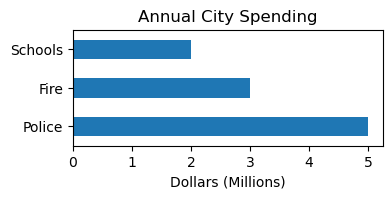

In [17]:
# paste the previous code cell here and modify
ax = (s/10**6).plot.barh(figsize=(4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

## Example 5: Change bar color by using the argument `color`

<pre>
- plot.bar(figsize=(width,height ), color=???)
- 8 standard colors: r, g, b, c, m, y, k, w    color='c'  cyan
- can use value of grey between 0 and 1        color='0.6'
- can use a tuple (r,g,b) between 0 and 1      color=(0, 0.3, 0.4)
</pre>

Text(0.5, 1.0, 'Annual City Spending')

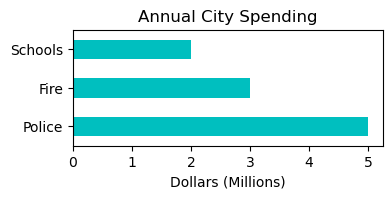

In [18]:
# color as a single char
ax = (s/10**6).plot.barh(figsize=(4, 1.5), color='c')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

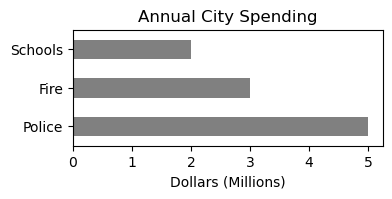

In [19]:
# color as a value of grey
ax = (s/10**6).plot.barh(figsize=(4, 1.5), color='0.5')
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

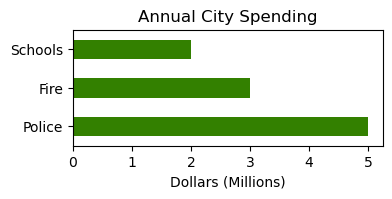

In [20]:
# color as tuple of (r,g,b)
ax = (s/10**6).plot.barh(figsize=(4, 1.5), color=(.2, .5, 0))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

# Movies Database

## Exercise 1: What happens if we just plot the entire data frame?

In [21]:
movies_df.plot.bar() # Answer: Each x label is a movie, and there is a bar for each numeric data type.

<Axes: >

#### Let's see that more clearly by plotting the first 3 movies

<Axes: >

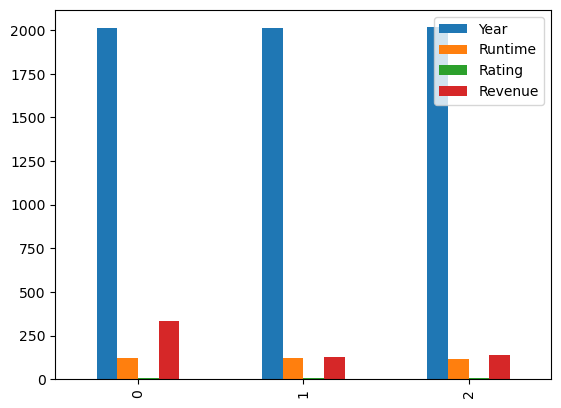

In [22]:
movies_df.iloc[:3].plot.bar()

## Exercise 2: Plot just the Revenue of the first three movies

<Axes: >

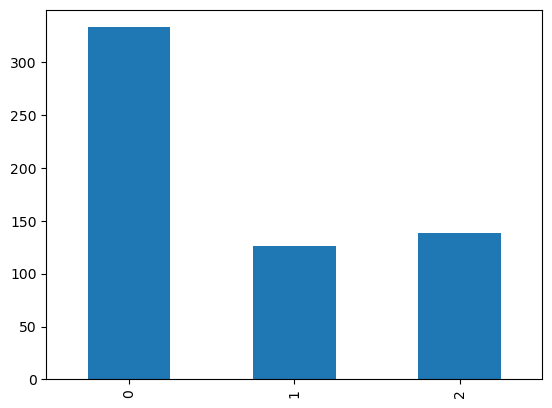

In [23]:
# write your code here

movies_df.iloc[:3]["Revenue"].plot.bar()

#### What is movie 0??? Let's make the title our index (hint: it's unique!)

In [24]:
movies_df = movies_df.set_index("Title")
movies_df.head()

Genre              Director  \
Title                                                                     
Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
Prometheus               Adventure,Mystery,Sci-Fi          Ridley Scott   
Split                             Horror,Thriller    M. Night Shyamalan   
Sing                      Animation,Comedy,Family  Christophe Lourdelet   
Suicide Squad            Action,Adventure,Fantasy            David Ayer   

                                                                      Cast  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael   ...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime  Rating  Revenue  
Title                                                    
Guardians of the Galaxy  2014      121     8.1   333.13  
Prometheus               2012      124     7.0   126.46  
Split                    2016      117     7.3   138.12  
Sing                     2016      108     7.2   270.32  
Suicide Squad            2016      123     6.2   325.02

## Exercise 3: What are revenues of the 10 movies with the highest revenue?

In [25]:
# write your code here

top_rev_movies = movies_df["Revenue"].sort_values(ascending=False).iloc[:10]
top_rev_movies

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avengers: Endgame                             858.37
Avatar                                        760.51
Avengers: Infinity War                        678.82
Jurassic World                                652.18
The Avengers                                  623.28
Hamilton                                      612.82
Incredibles 2                                 608.58
The Dark Knight                               533.32
Rogue One                                     532.17
Name: Revenue, dtype: float64

#### Now plot them!

In [26]:
# write your code here

top_rev_movies.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon")

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>

## Exercise 4: Have another bar called `"Other"` to represent the sum of revenues of all the other movies

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>

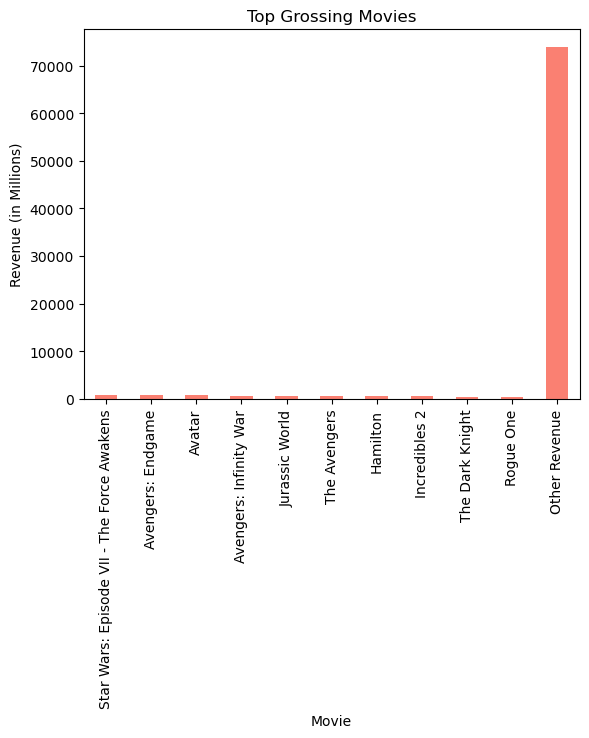

In [27]:
# write your code here

other_rev = movies_df["Revenue"].sort_values(ascending=False).iloc[10:].sum()
top_rev_movies_with_other = copy.deepcopy(top_rev_movies)
top_rev_movies_with_other["Other Revenue"] = other_rev
top_rev_movies_with_other.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon")

#### You can add the argument `logy=True` to show the data on a logarithmic scale

In [28]:
# write your code here

top_rev_movies_with_other.plot.bar(xlabel="Movie", ylabel="Revenue (in Millions)", title="Top Grossing Movies", color="salmon", logy=True)

<Axes: title={'center': 'Top Grossing Movies'}, xlabel='Movie', ylabel='Revenue (in Millions)'>